In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

nick_theme = {**style.library["seaborn-v0_8-whitegrid"]}
nick_theme.update({"font.sans-serif": ["Fira Sans", "Arial", "sans-serif"]})
plt.rcParams.update(nick_theme)

In [2]:
def generalized_logistic(x, A=0, K=1, B=1, nu=1, Q=1, M=0):
    """
    Generalized logistic function (Richards' curve).

    Parameters:
    -----------
    x : array-like
        Input values
    A : float, default=0
        Lower asymptote
    K : float, default=1
        Upper asymptote (carrying capacity)
    B : float, default=1
        Growth rate/steepness
    nu : float, default=1
        Affects near which asymptote maximum growth occurs
    Q : float, default=1
        Related to the value Y(0)
    M : float, default=0
        Time of maximum growth if Q=nu

    Returns:
    --------
    array-like
        Y values of the generalized logistic function

    Formula:
    --------
    Y(x) = A + (K-A) / (1 + Q * exp(-B*(x-M)))^(1/nu)
    """
    x = np.asarray(x)
    numerator = K - A
    denominator = (1 + Q * np.exp(-B * (x - M))) ** (1 / nu)
    return A + numerator / denominator

Stata
R (Tidy-Verse)
R (Base-R)
Python


/var/folders/fs/h_8_rwsn5hvg9mhp0txgc_s9v6191b/T/ipykernel_31847/3061899918.py:78: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


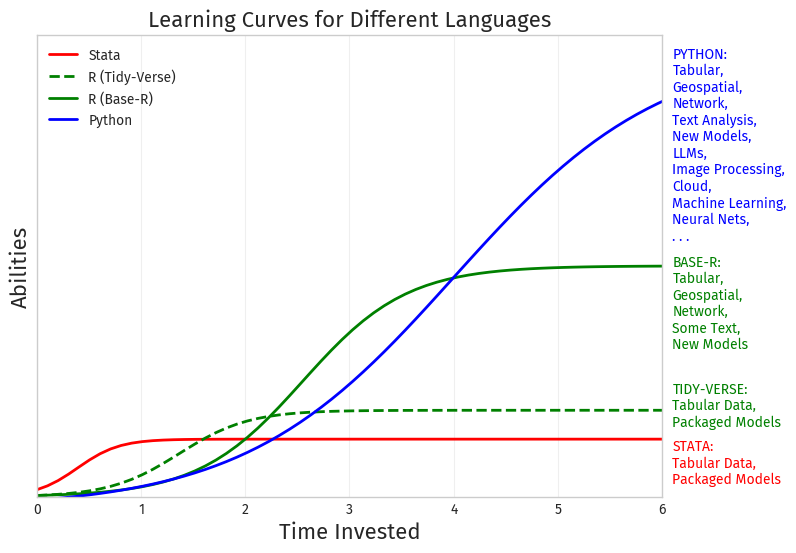

In [7]:
# Example usage:
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(right=0.75)
ax.set_xlabel("Time Invested", size=16)
ax.set_ylabel("Abilities", size=16)
ax.set_ylim([0, 8])
ax.set_xlim([0, 6])
ax.set_title("Learning Curves for Different Languages", size=16)
ax.grid(True, alpha=0.3)
ax.set_yticks([])

x = np.linspace(0, 10, 100)
languages = dict()
languages["Stata"] = (generalized_logistic(x, A=0, K=1, B=5, nu=1, Q=7, M=0), "r-")
languages["R (Tidy-Verse)"] = (
    generalized_logistic(x, A=0, K=1.5, B=3, nu=1, Q=3, M=1),
    "g--",
)
languages["R (Base-R)"] = (
    generalized_logistic(x, A=0, K=4, B=2, nu=1, Q=3, M=2),
    "g-",
)
languages["Python"] = (
    generalized_logistic(x, A=0, K=8, B=1, nu=1, Q=1, M=4) - 0.2,
    "b-",
)


counter = 1
fig.savefig(f"language_0.png", transparent=True, bbox_inches="tight")

for i in languages.keys():
    print(i)
    ax.plot(x, languages[i][0], languages[i][1], linewidth=2, label=i)
    if i == "Stata":
        ax.text(
            6.1,
            1,
            "STATA:\nTabular Data,\nPackaged Models",
            ha="left",
            va="top",
            color="red",
        )
    elif i == "R (Tidy-Verse)":
        ax.text(
            6.1,
            2,
            "TIDY-VERSE:\nTabular Data,\nPackaged Models",
            ha="left",
            va="top",
            color="green",
        )
    elif i == "R (Base-R)":
        ax.text(
            6.1,
            4.2,
            "BASE-R:\nTabular,\nGeospatial,\nNetwork,\nSome Text,\nNew Models",
            ha="left",
            va="top",
            color="green",
        )
    elif i == "Python":
        ax.text(
            6.1,
            7.8,
            "PYTHON:\nTabular,\nGeospatial,\nNetwork,\nText Analysis,"
            "\nNew Models,\nLLMs,\nImage Processing,"
            "\nCloud,\nMachine Learning,\nNeural Nets,\n. . .",
            ha="left",
            va="top",
            color="blue",
        )
    ax.legend(loc="upper left")
    fig.savefig(f"language_{counter}.png", transparent=True, bbox_inches="tight")
    counter += 1


fig.show()